In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader as dt
from  tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping

In [3]:
dt = pd.read_csv(r"C:\Users\HONER\Downloads\Apple (AAPL) From 1980 To Dec-2024.csv")

In [4]:
dt = dt.head(300)

In [5]:
dt.shape

(300, 6)

In [6]:
dt

,Date,Open,High,Low,Close,Volume
0,1980-12-12 00:00:00-05:00,0.098834,0.099264,0.098834,0.098834,469033600
1,1980-12-15 00:00:00-05:00,0.094108,0.094108,0.093678,0.093678,175884800
2,1980-12-16 00:00:00-05:00,0.087232,0.087232,0.086802,0.086802,105728000
3,1980-12-17 00:00:00-05:00,0.088951,0.089381,0.088951,0.088951,86441600
4,1980-12-18 00:00:00-05:00,0.091530,0.091959,0.091530,0.091530,73449600
...,...,...,...,...,...,...
295,1982-02-12 00:00:00-05:00,0.064457,0.064887,0.064457,0.064457,19644800
296,1982-02-16 00:00:00-05:00,0.063598,0.063598,0.063168,0.063168,34316800
297,1982-02-17 00:00:00-05:00,0.064027,0.064457,0.064027,0.064027,25580800
298,1982-02-18 00:00:00-05:00,0.064887,0.065316,0.064887,0.064887,28380800


* Data Preprocessing

In [7]:
dt.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [8]:
dt.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
dtype: object

In [9]:
dt['Date'] = pd.to_datetime(dt['Date'])

C:\Users\HONER\AppData\Local\Temp\ipykernel_10736\3585999300.py:1: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  dt['Date'] = pd.to_datetime(dt['Date'])


In [10]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    300 non-null    object 
 1   Open    300 non-null    float64
 2   High    300 non-null    float64
 3   Low     300 non-null    float64
 4   Close   300 non-null    float64
 5   Volume  300 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 14.2+ KB


In [11]:
dt.set_index('Date', inplace = True)

In [12]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300 entries, 1980-12-12 00:00:00-05:00 to 1982-02-19 00:00:00-05:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    300 non-null    float64
 1   High    300 non-null    float64
 2   Low     300 non-null    float64
 3   Close   300 non-null    float64
 4   Volume  300 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 14.1+ KB


In [13]:
dt.head()

,Open,High,Low,Close,Volume
Date,,,,,
1980-12-12 00:00:00-05:00,0.098834,0.099264,0.098834,0.098834,469033600
1980-12-15 00:00:00-05:00,0.094108,0.094108,0.093678,0.093678,175884800
1980-12-16 00:00:00-05:00,0.087232,0.087232,0.086802,0.086802,105728000
1980-12-17 00:00:00-05:00,0.088951,0.089381,0.088951,0.088951,86441600
1980-12-18 00:00:00-05:00,0.091530,0.091959,0.091530,0.091530,73449600


In [14]:
# Sorting idex

In [15]:
dt.sort_index(inplace=True)

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
scaler = MinMaxScaler()
scaler_values = scaler.fit_transform(dt[dt.columns])

In [18]:
dt_scaled = pd.DataFrame(scaler_values ,columns = dt.columns,index = dt.index)

In [19]:
dt_scaled.head()

,Open,High,Low,Close,Volume
Date,,,,,
1980-12-12 00:00:00-05:00,0.664740,0.664740,0.666667,0.666667,1.000000
1980-12-15 00:00:00-05:00,0.601160,0.595380,0.597705,0.597705,0.374994
1980-12-16 00:00:00-05:00,0.508670,0.502890,0.505747,0.505747,0.225417
1980-12-17 00:00:00-05:00,0.531789,0.531789,0.534480,0.534480,0.184297
1980-12-18 00:00:00-05:00,0.566480,0.566480,0.568971,0.568971,0.156598


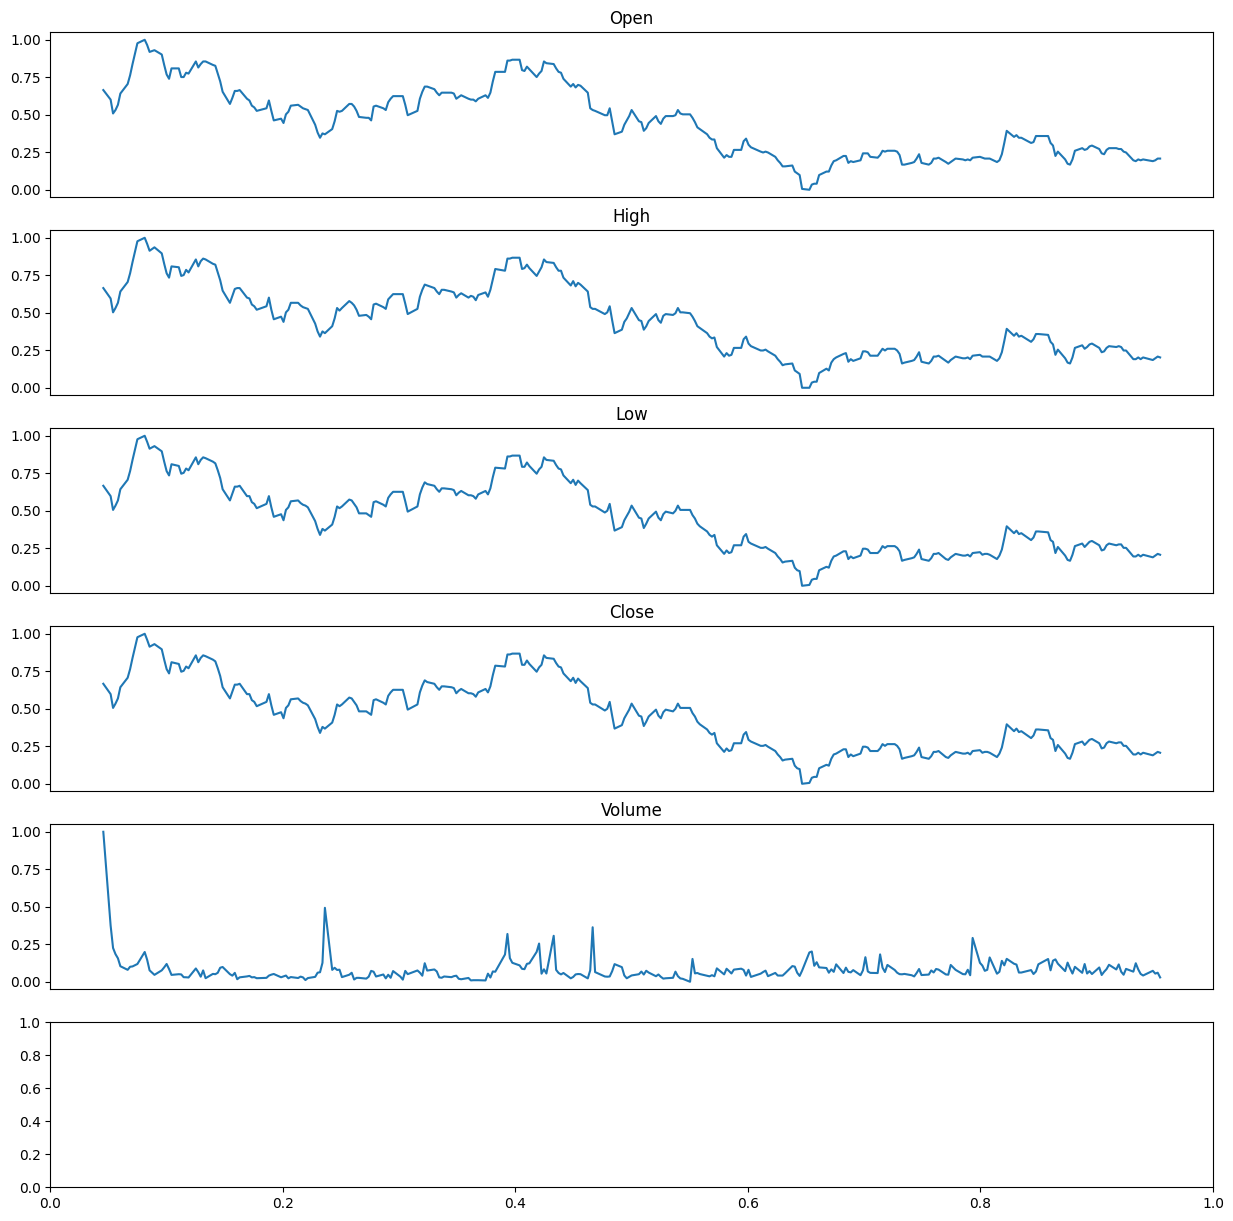

In [20]:
plt.rcParams['figure.figsize'] = (15,15)
figure, axes = plt.subplots(6)

for ax,col in zip(axes,dt_scaled.columns):
    ax.plot(dt_scaled[col])
    ax.set_title(col)
    ax.axes.xaxis.set_visible(False)

* Creating the sliding window sequences

In [21]:
def create_sequence(data,window_size):
    x = []
    y = []
    for i in range(window_size,len(data)):
        x.append(data.iloc[i-window_size:i].values)
        y.append(data.iloc[i].values)
    return np.array(x), np.array(y)
        
        

In [22]:
window_size = 60
x,y = create_sequence(dt_scaled, window_size)

In [23]:
x.shape

(240, 60, 5)

In [24]:
y.shape

(240, 5)

* Train test split

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [27]:
x_train.shape

(192, 60, 5)

In [28]:
x_test.shape

(48, 60, 5)

## Building LSTM Model

In [29]:
model = keras.Sequential([# adding the first LSTM layer

    keras.layers.LSTM(units = 50,return_sequences = True,input_shape = (x_train.shape[1],x_train.shape[2])),
    keras.layers.Dropout(0.3),

    # adding the second LSTM layer

    keras.layers.LSTM(units = 50,return_sequences = True),
    keras.layers.Dropout(0.3),

    # adding the third LSTM layer

    keras.layers.LSTM(units = 50,return_sequences = False),
    keras.layers.Dropout(0.3),

    # adding output layer

    keras.layers.Dense(y_train.shape[1])


    

])


C:\Users\HONER\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [30]:
# compilation
model.compile(optimizer = 'adam',

              loss = 'mean_squared_error',
              metrics = ['RootMeanSquaredError'])




In [31]:
# early Stopping 

early_stopping = EarlyStopping(monitor = 'val_loss',
                               patience = 10,
                               restore_best_weights = True)

In [32]:
lstm_model = model.fit(x_train,y_train,
                       validation_split = 0.2,
                       epochs = 100,
                       batch_size = 3,
                       callbacks = [early_stopping])

Epoch 1/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 22s 134ms/step - RootMeanSquaredError: 0.2053 - loss: 0.0426 - val_RootMeanSquaredError: 0.0948 - val_loss: 0.0090
Epoch 2/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - RootMeanSquaredError: 0.1491 - loss: 0.0223 - val_RootMeanSquaredError: 0.0957 - val_loss: 0.0092
Epoch 3/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - RootMeanSquaredError: 0.1358 - loss: 0.0185 - val_RootMeanSquaredError: 0.1135 - val_loss: 0.0129
Epoch 4/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - RootMeanSquaredError: 0.1262 - loss: 0.0160 - val_RootMeanSquaredError: 0.1082 - val_loss: 0.0117
Epoch 5/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 5s 103ms/step - RootMeanSquaredError: 0.1349 - loss: 0.0184 - val_RootMeanSquaredError: 0.0821 - val_loss: 0.0067
Epoch 6/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 11s 119ms/step - RootMeanSquaredError: 0.1160 - loss: 0.0135 - val_RootMeanSquaredError: 0.0775 - val_loss: 0.0060
Epoch 7/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 6s 118ms/step - RootMeanSquaredError: 0.1294

In [33]:
lstm_model.history

{'RootMeanSquaredError': [0.18408873677253723,
  0.14755819737911224,
  0.13298307359218597,
  0.1257523149251938,
  0.12999075651168823,
  0.11306831985712051,
  0.12151843309402466,
  0.11367864906787872,
  0.10102576017379761,
  0.10742270946502686,
  0.11134601384401321,
  0.09942100197076797,
  0.10163705050945282,
  0.09817773848772049,
  0.0913487896323204,
  0.09210401773452759,
  0.09192933142185211,
  0.09799446165561676,
  0.0897764042019844,
  0.0869484692811966,
  0.09029357135295868,
  0.0863938108086586,
  0.08420544862747192,
  0.08407033979892731,
  0.08433861285448074,
  0.07852869480848312,
  0.07450951635837555,
  0.081217460334301,
  0.07873951643705368,
  0.07592684775590897,
  0.07545492053031921,
  0.07395019382238388,
  0.07750153541564941,
  0.076088085770607,
  0.07214101403951645,
  0.07002799957990646,
  0.06663555651903152,
  0.07325601577758789,
  0.07288440316915512,
  0.06833414733409882,
  0.07552974671125412,
  0.07351022958755493,
  0.067875854671001

In [36]:
predictions = model.predict(x_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


In [37]:
# inverse scaling 

predictions = scaler.inverse_transform(predictions)
y_test_rescaled = scaler.inverse_transform(y_test)

In [38]:
predictions[:10]

array([[9.5190153e-02, 9.5409028e-02, 9.4762005e-02, 9.5366552e-02,
        3.3622560e+07],
       [8.7957181e-02, 8.8656254e-02, 8.7622583e-02, 8.8311493e-02,
        3.2288180e+07],
       [7.9721853e-02, 8.0089033e-02, 7.9263039e-02, 7.9861425e-02,
        3.1798270e+07],
       [8.2088761e-02, 8.2483880e-02, 8.1598006e-02, 8.2241841e-02,
        3.2636540e+07],
       [8.6988010e-02, 8.7343924e-02, 8.6571120e-02, 8.7126561e-02,
        3.1938130e+07],
       [6.2000871e-02, 6.2466260e-02, 6.1630525e-02, 6.1765831e-02,
        3.5609888e+07],
       [6.3847505e-02, 6.4315744e-02, 6.3445412e-02, 6.3681327e-02,
        3.4905328e+07],
       [7.8848980e-02, 7.9235442e-02, 7.8298301e-02, 7.9079397e-02,
        3.2389338e+07],
       [9.0193346e-02, 9.0739585e-02, 8.9909479e-02, 9.0489589e-02,
        3.2184316e+07],
       [5.3842090e-02, 5.4703362e-02, 5.3727619e-02, 5.3603340e-02,
        4.2034560e+07]], dtype=float32)

## Plotting Prediction

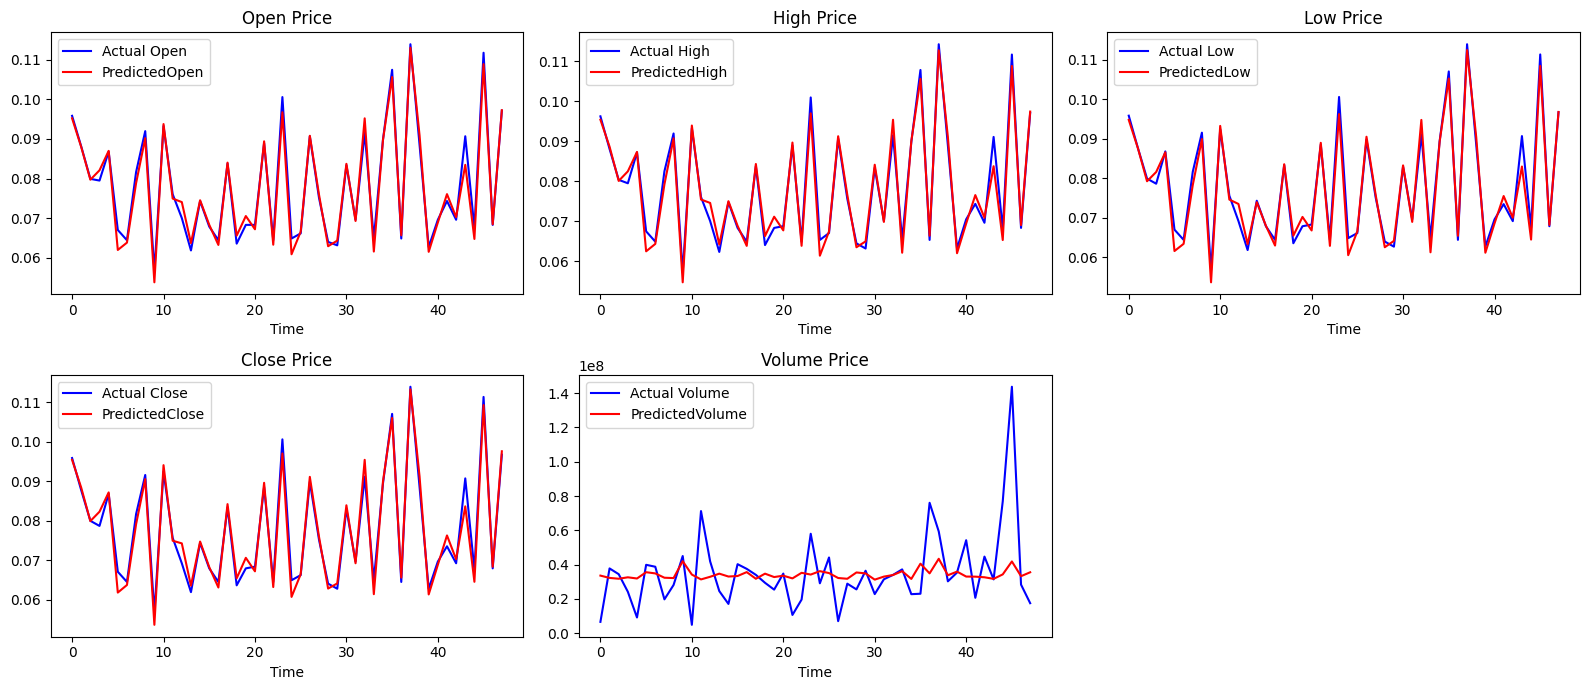

In [41]:
plt.figure(figsize = (16,7))
for i , col in enumerate(dt_scaled.columns):
    plt.subplot(2,3,i+1)
    plt.plot(y_test_rescaled[:,i],color = 'blue',label = f'Actual {col}')
    plt.plot(predictions[:,i],color = 'red',label = f'Predicted{col}')
    plt.title(f'{col} Prediction')
    plt.xlabel('Time')
    plt.title(f'{col} Price')
    plt.legend()

plt.tight_layout()